In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [12]:
from argparse import Namespace
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import pbio.misc.mpl_utils as mpl_utils
import pbio.misc.math_utils as math_utils

import pickle

import pbio.misc.logging_utils as logging_utils

In [3]:
args = Namespace()
logger = logging_utils.get_ipython_logger()

In [40]:
args.model = "/prj/rpbp-paper/RPF/orf-predictions/plots/hek293.subcodon-clusters.pkl"
args.out = "/prj/rpbp-paper/RPF/orf-predictions/plots/hek293.subcodon-clusters.pdf"

args.title = "HEK293"
args.min_weight = 0.001
args.log = True

In [5]:
msg = "Reading model pickle file"
logger.info(msg)

model_pkl = pickle.load(open(args.model, 'rb'))

INFO     : Reading model pickle file


In [6]:
msg = "Extracting clusters with minimum weight"
logger.info(msg)

it = enumerate(zip(model_pkl[0], model_pkl[1]))

periodic_clusters = []

total_weight = 0
for i, (m, w) in it:
    if w > args.min_weight:        
        total_weight += w
        periodic_clusters.append(i)

INFO     : Extracting clusters with minimum weight


In [34]:
msg = "Finding linear best fit line"
logger.info(msg)

c = model_pkl[0][periodic_clusters, 0]
x = model_pkl[0][periodic_clusters, 1]
y = model_pkl[0][periodic_clusters, 2]
s = model_pkl[1][periodic_clusters]

fit = math_utils.fit_with_least_squares(x, y, w=s)
(slope, intercept, power, r_sqr) = fit

INFO     : Finding linear best fit line


INFO     : Plotting clusters
DEBUG    : x=[    8.35425262    36.61205721    41.99155113    91.73912656   114.94530738
   146.85563691   148.95988707   158.15413463   186.77243878   229.7775628
   268.3534197    363.84677024   367.2383792    375.19984095   382.36491975
   410.20124072   449.30501982   494.38274815   503.21981717   561.64064093
   603.29406929   605.79902861   623.48746286   708.86940801   708.88802704
   845.00577441   978.13884094   987.03590025  1025.79384567  1225.57752826
  1372.21324188  1444.99931024  1515.56935758  1756.18398209  1818.88059479
  2526.46629057  2704.11190792]
DEBUG    : y=[   99.34380597   142.19829021   150.35658278   225.80146318   260.99488761
   309.38862285   312.57983167   326.52340383   369.9246051    435.14419439
   493.64656128   638.4673761    643.61093395   655.68491996   666.55114829
   708.76642989   768.06941926   836.43222474   849.83411637   938.43244549
  1001.60211543  1005.4010213   1032.22648556  1161.71280894  1161.74104569
  

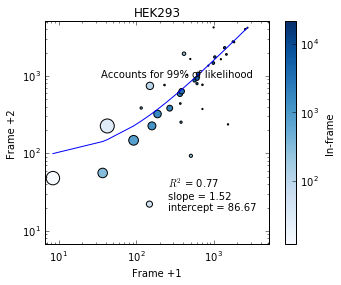

In [43]:
msg = "Plotting clusters"
logger.info(msg)

min_val = min(min(x), min(y)) * 0.8
max_val = max(max(x), max(y)) * 1.2
lim = (min_val, max_val)

fig, ax = plt.subplots()

# axes and labels and things
ax.set_aspect('equal')
ax.set_xlabel("Frame +1")
ax.set_ylabel("Frame +2")

ax.set_xlim(lim)
ax.set_ylim(lim)

if args.log:
    ax.set_xscale('log')
    ax.set_yscale('log')

cm = plt.cm.Blues

norm = None
if args.log:
    norm=matplotlib.colors.LogNorm()
    
sc = ax.scatter(x, y, c=c, cmap=cm, s=s*1000, norm=norm)
cb = plt.colorbar(sc, ax=ax)
cb.set_label("In-frame")

text = "Accounts for {:.0%} of likelihood".format(total_weight)
ax.annotate(text, (0.25,0.75), xycoords='axes fraction')

# draw the fit line
mpl_utils.plot_trend_line(ax, x, intercept, slope, power)

# write the fit information
rsqr_str = "$R^2$ = {:.2f}".format(r_sqr)
slope_str = "slope = {:.2f}".format(slope)
intercept_str = "intercept = {:.2f}".format(intercept)
strs = [rsqr_str, slope_str, intercept_str]
text = '\n'.join(strs)

ax.annotate(text, (0.55, 0.15), xycoords='axes fraction')

if len(args.title) > 0:
    ax.set_title(args.title)
    
msg = "Writing the plot to disk"
logger.info(msg)
    
#fig.savefig(args.out)

In [33]:
x, y

(array([ 1025.79384567,   367.2383792 ,   410.20124072,   363.84677024,
          978.13884094,  1225.57752826,   503.21981717,   158.15413463,
            8.35425262,   561.64064093,  1444.99931024,  1372.21324188,
         1515.56935758,   603.29406929,   605.79902861,   114.94530738,
          146.85563691,   148.95988707,  2704.11190792,   268.3534197 ,
          623.48746286,   382.36491975,  1818.88059479,   708.88802704,
           41.99155113,   987.03590025,   186.77243878,   494.38274815,
          708.86940801,   229.7775628 ,    91.73912656,   845.00577441,
          449.30501982,  2526.46629057,   375.19984095,  1756.18398209,
           36.61205721]),
 array([ 1748.1631928 ,   439.83428331,  1931.20890536,   584.8595453 ,
         1464.55707489,  1638.58706183,    93.0967025 ,   226.21378547,
           47.94173623,   872.34224905,  1891.6629421 ,  2303.27227117,
          236.69161977,   793.28305485,   928.95269527,   385.1617974 ,
           22.15980451,   742.64940726